# Statistics 447b Project

In [7]:
library(tidyverse)
library(ggmap)

In [12]:
DatasetPath <- "data/train.csv"

In [13]:
training <- read.csv(DatasetPath)

In [14]:
# remove near zero values for "TotalTimeStopped"
filter_training <- training %>% filter(TotalTimeStopped_p50 > 0)
filter_training$TotalTimeStopped_p50 <- log(filter_training$TotalTimeStopped_p50)
head(filter_training)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,⋯,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1922012,1,33.75094,-84.39303,Mitchell Street Southwest,Peachtree Street Southwest,SE,NE,7,0,⋯,23,55,57,75,0.0,50.6,52.7,56.5,69.9,Atlanta
2,1922013,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,7,0,⋯,26,29,31,37,0.0,57.3,70.6,78.6,99.8,Atlanta
3,1922014,1,33.75094,-84.39303,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,7,0,⋯,59,62,72,87,0.0,53.7,55.1,56.6,61.6,Atlanta
4,1922015,1,33.75094,-84.39303,Mitchell Street Southwest,Mitchell Street Southwest,SE,SE,8,0,⋯,0,34,60,110,0.0,0.0,63.0,88.0,206.9,Atlanta
5,1922016,1,33.75094,-84.39303,Mitchell Street Southwest,Peachtree Street Southwest,SE,NE,8,0,⋯,58,58,96,96,51.7,60.1,60.1,78.3,82.7,Atlanta
6,1922017,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,8,0,⋯,0,26,34,43,0.0,0.0,60.0,73.7,95.5,Atlanta


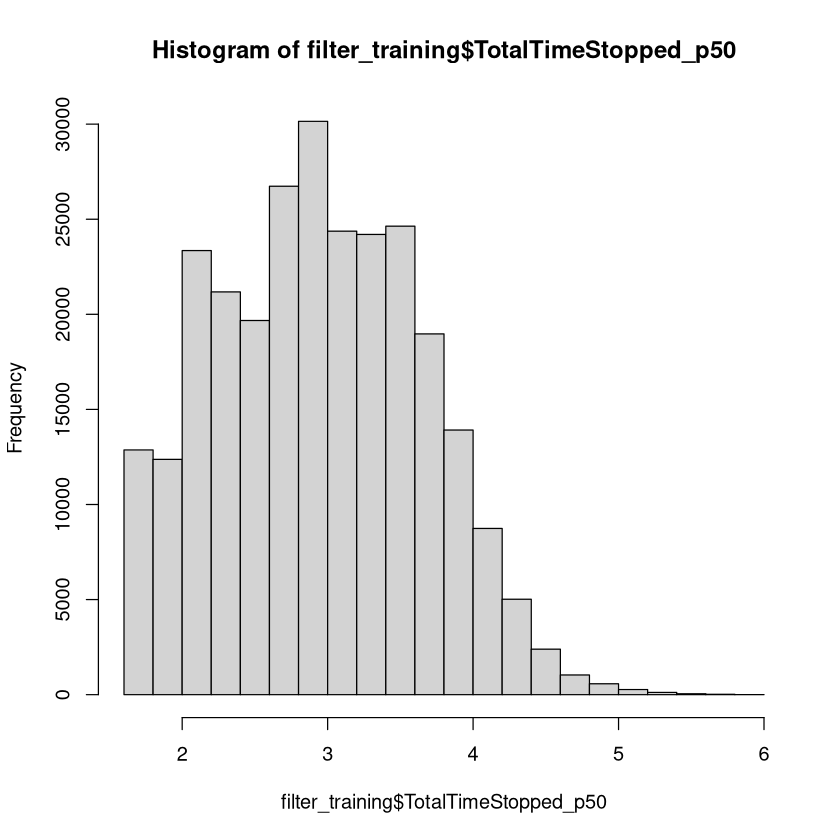

In [15]:
# create histogram of response variable
hist(filter_training$TotalTimeStopped_p50)

In [16]:
# feature engineering:
# transformation of EntryHeading and ExitHeading into a binary variable straightThrough

# reasoning: 
# a vehicle making a left or right turn must yeild to pedestrians and oncome traffic
# as well as, wait for the correct light. Therefore, one would expect a vehicle
# that doesn't go straight through take longer...

# Not all intersections are equal...
# Some intersections are 3 way fork intersections
augmented_training = filter_training %>% mutate(straightThrough = EntryHeading == ExitHeading)

[1] 3.064583

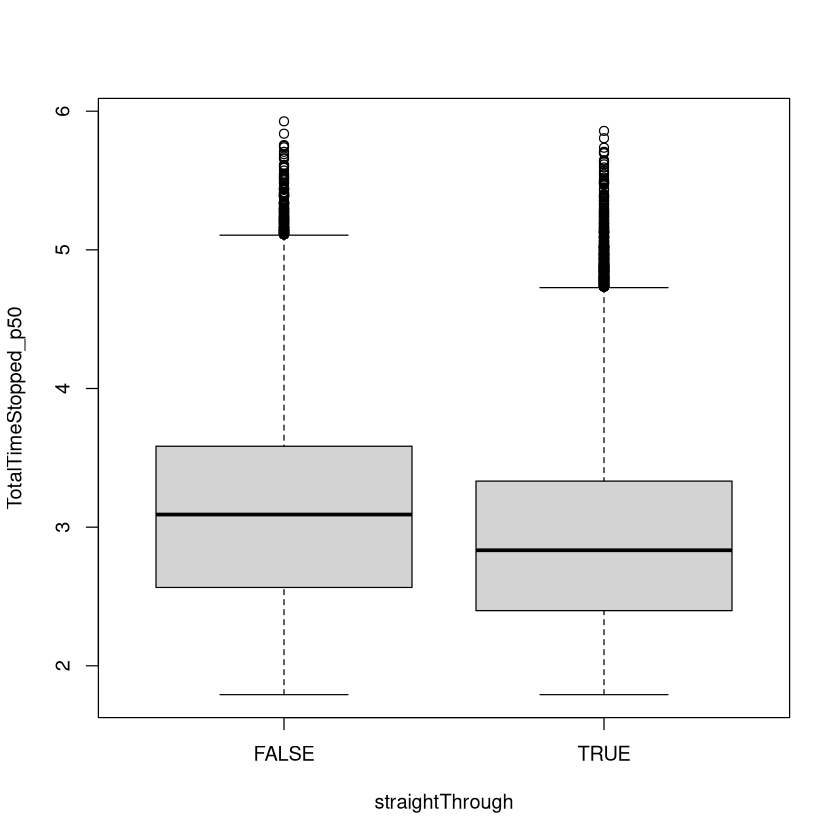

In [28]:
r <- augmented_training %>% filter(Weekend == 1 & Hour == 12)
boxplot(TotalTimeStopped_p50 ~ straightThrough, data = augmented_training)
mean((augmented_training %>% filter(straightThrough == FALSE))$TotalTimeStopped_p50)

In [ ]:
isRightTurn <- function(entry, exit) {
    rightexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W")
    )
    exit %in% rightexit[[entry]]
}

In [ ]:
isRightTurn("S", "E")

In [ ]:
rightTurnsAllowed <- function(dataset) {
    dataset["rightTurn"] <- isRightTurn()
}

In [ ]:
rightTurnsAllowed(augmented_training)

In [ ]:
list(SE=1234)[as.character(augmented_training[1,]["EntryHeading"])]
as.character(augmented_training[1,][["EntryHeading"]])

In [ ]:
    rightexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W")
    )

In [ ]:
c(rightexit[["N"]])

In [ ]:
rightTurnsAllowed <- function(dataset) {
    leftexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W"),
    )
    dataset %>% mutate()
}

In [ ]:
unique(augmented_training$EntryHeading)

In [ ]:
# there are many interaction between the variables

In [ ]:
# log transformation
# why do we need to transorm the data?

In [ ]:
# check for na values
cbind(
   lapply(
     lapply(filter_training, is.na)
     , sum)
   )

In [21]:
boundingBox <- function (dataset) {
    c(
        left = min(dataset$Longitude), 
        bottom = min(dataset$Latitude), 
        right = max(dataset$Longitude), 
        top = max(dataset$Latitude)
    )
}

In [22]:
generate_map <- function (dataset) {
    u <- unique(dataset$City)
    for (city in u) {
        ccity_dataset <- dataset %>% filter(City == city)
        cbox <- boundingBox(ccity_dataset)
        print(city)
        print(
            get_stamenmap(cbox, zoom = 7, maptype = "toner-lite") %>% ggmap() +
            geom_point(data = ccity_dataset, mapping = aes(
                x = Longitude, 
                y = Latitude,
                col = TimeFromFirstStop_p50
            )) + 
            scale_color_distiller(palette = "YlOrRd", direction = 1)
        )
    }
}

[1] "Atlanta"


Source : http://tile.stamen.com/toner-lite/7/33/51.png

Source : http://tile.stamen.com/toner-lite/7/34/51.png



[1] "Boston"


Source : http://tile.stamen.com/toner-lite/7/38/47.png



[1] "Chicago"


Source : http://tile.stamen.com/toner-lite/7/32/47.png



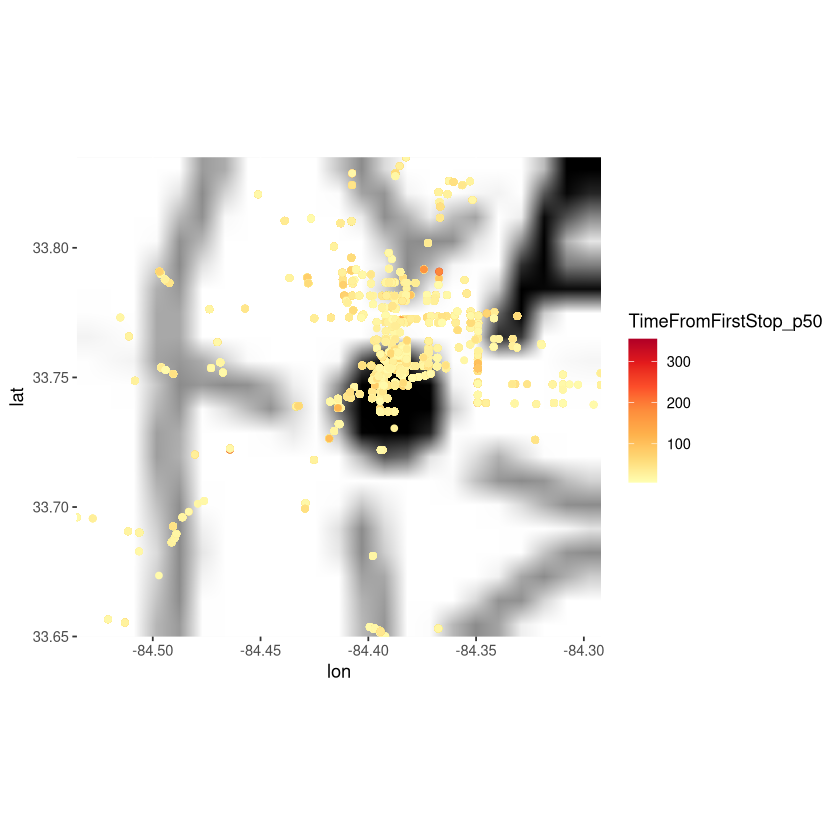

[1] "Philadelphia"


Source : http://tile.stamen.com/toner-lite/7/37/48.png



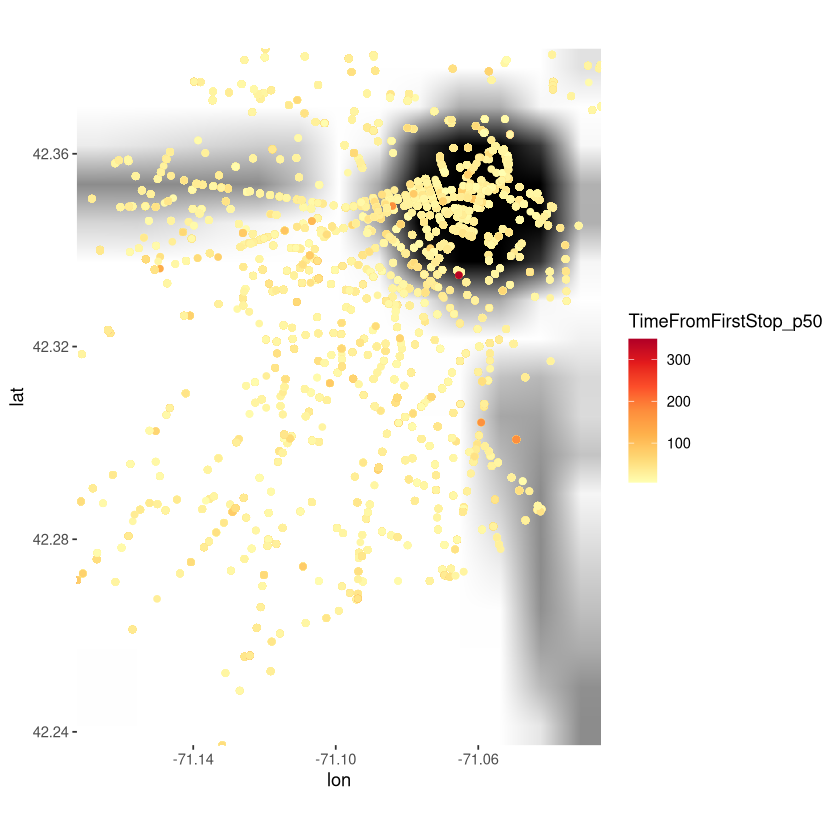

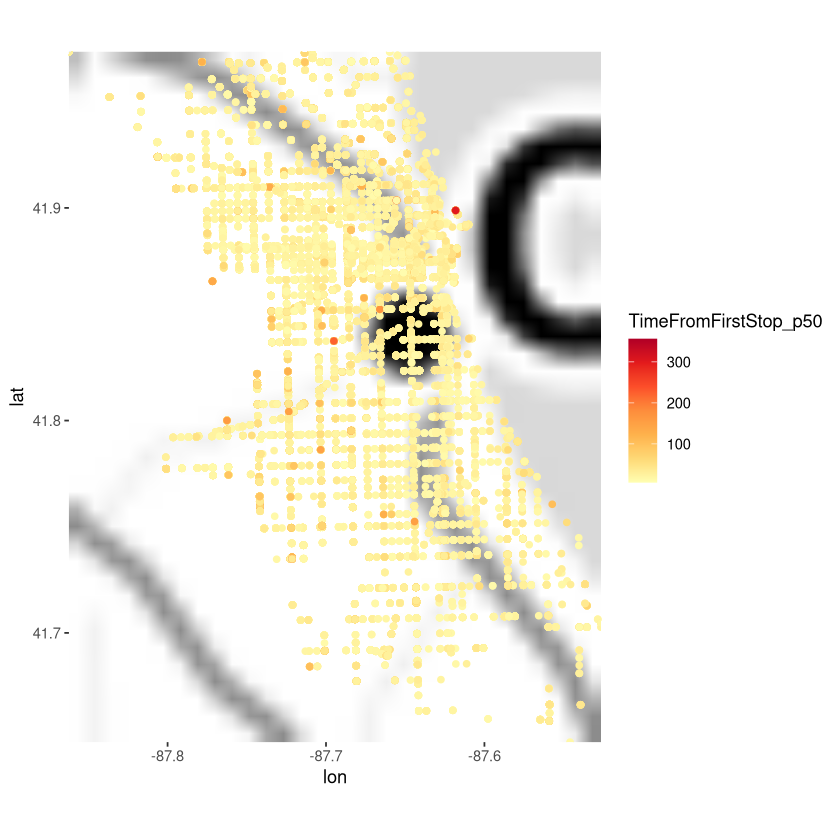

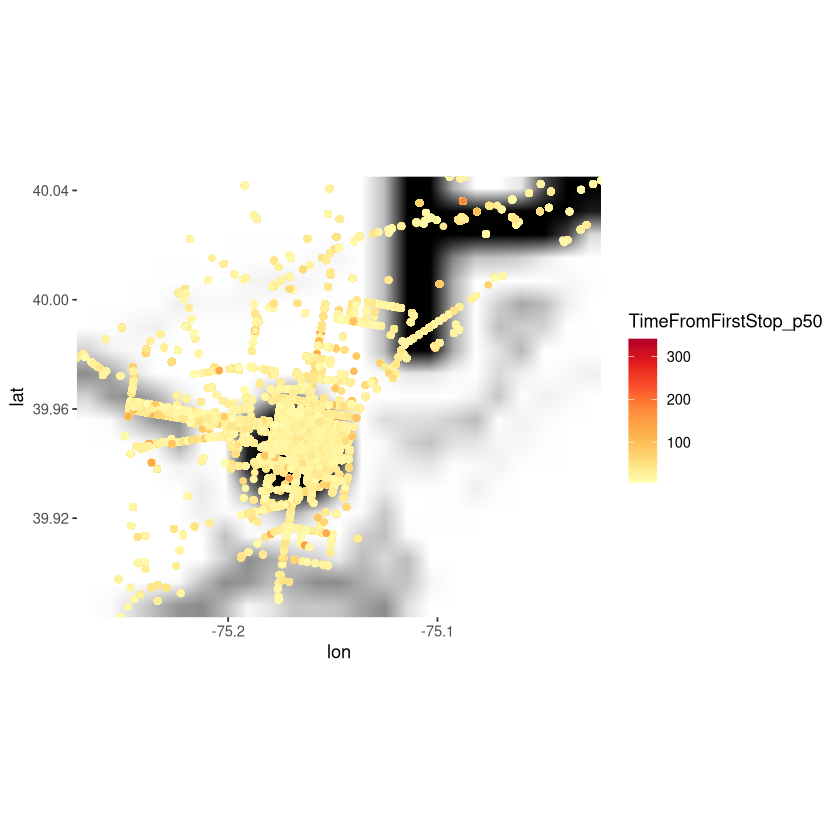

In [23]:
generate_map(filter_training)

In [ ]:
a <- colnames(filter_training)
for (icname in a) {
    print(icname)
    print(hist(filter_training %>% select(icname)))
}

In [ ]:
colnames(filter_training)

In [ ]:
hist(filter_training["RowId"])

In [ ]:
# remove missing values

In [ ]:
# transform variables

In [ ]:
# pairwise scatter plots

In [ ]:
# boxplots

In [ ]:
# correlation table

# co - lineararity

In [ ]:
# Left turn, right turn, straight through, feature engineering column...